#Using K-Means Clustering

## Importing the libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

## Importing the dataset

In [12]:
dataset = pd.read_csv('Mall_Customers.csv')
X= dataset.iloc[: ,[3,4]].values

## Using the elbow method to find the optimal number of clusters

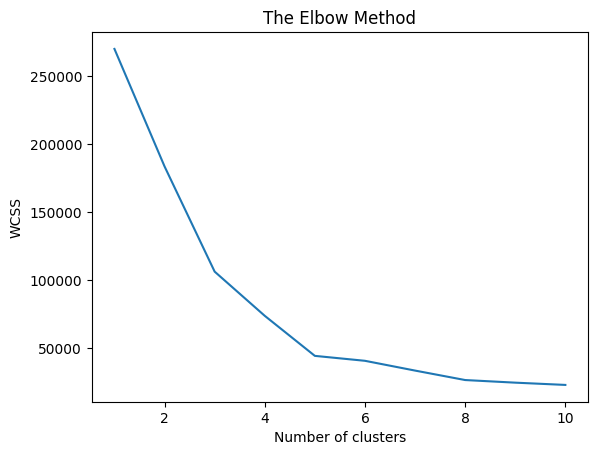

In [13]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters = i ,init='k-means++' ,random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot( range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [14]:
kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
y_kmeans=kmeans.fit_predict(X)

## Visualising the K-Means clusters

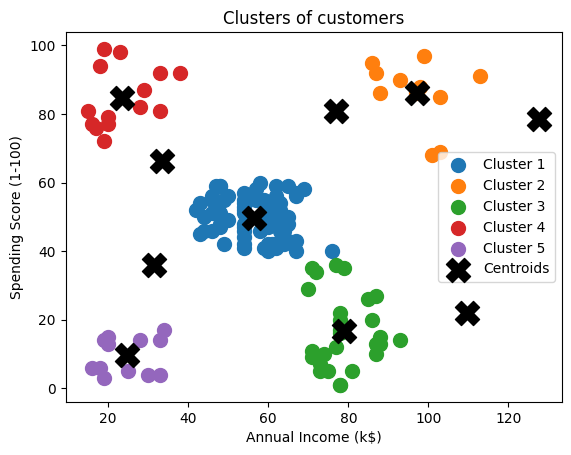

In [15]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='#1f77b4', label='Cluster 1')  # Blue
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='#ff7f0e', label='Cluster 2')  # Orange
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='#2ca02c', label='Cluster 3')  # Green
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='#d62728', label='Cluster 4')  # Red
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='#9467bd', label='Cluster 5')  # Purple
# Cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Using Hierarchical Clustering

Using the dendrogram to find the optimal number of clusters

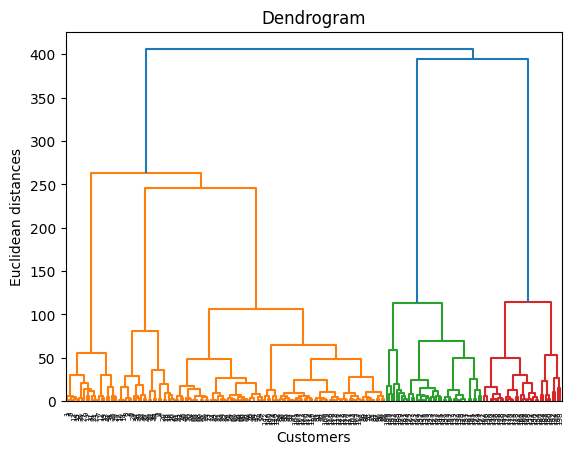

In [16]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [17]:
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

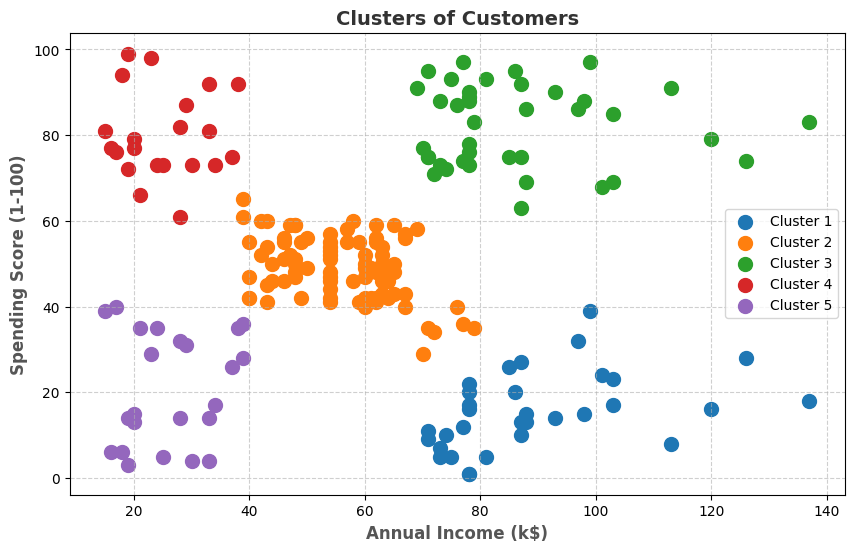

In [18]:

plt.figure(figsize=(10, 6))  # Set figure size

# Use a colorblind-friendly palette (Tableau or Viridis)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c=colors[0], label='Cluster 1')  # Blue
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c=colors[1], label='Cluster 2')  # Orange
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c=colors[2], label='Cluster 3')  # Green
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c=colors[3], label='Cluster 4')  # Red
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c=colors[4], label='Cluster 5')  # Purple

# Customizing the plot
plt.title('Clusters of Customers', fontsize=14, fontweight='bold', color='#333333')
plt.xlabel('Annual Income (k$)', fontsize=12, fontweight='bold', color='#555555')
plt.ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold', color='#555555')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)  # Subtle grid for better readability

plt.show()
